# Predicting the Trend of Dollar/Naira Exchange Rate Using Regression Model and Support Vector Machine and Artificial Neural Network

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

# load the dataset into a dataframe
df = pd.read_excel("./datasets/DollarXchangeRate.xlsx")

# print the first 5 rows of the dataframe
df.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,2022-12-21,US DOLLAR,2022,December,446.13,446.63,447.13
1,2022-12-20,US DOLLAR,2022,December,445.80,446.30,446.80
2,2022-12-19,US DOLLAR,2022,December,445.46,445.96,446.46
3,2022-12-16,US DOLLAR,2022,December,445.46,445.96,446.46
4,2022-12-15,US DOLLAR,2022,December,445.32,445.82,446.32


From the output, we can see that the dataset has been loaded succesfully and contains the columns we described eaerlier. Now, let's proceed with some basic EDA:

In [3]:
# check the shape of the dataframe
print(df.shape)

# check if there are any missing values in the dataframe
print(df.isnull().sum())

# get some basic statistics about the numerical columns in the dataframe
df.describe()

(5143, 7)
Rate Date       0
Currency        0
Rate Year       0
Rate Month      0
Buying Rate     0
Central Rate    0
Selling Rate    0
dtype: int64


,Rate Year,Buying Rate,Central Rate,Selling Rate
count,5143.000000,5143.000000,5143.000000,5143.000000
mean,2011.954112,205.307962,206.071997,206.355340
std,6.058627,98.538810,99.858959,98.509377
min,2001.000000,15.590000,66.090000,112.850000
25%,2007.000000,131.750000,132.250000,132.750000
50%,2012.000000,154.730000,155.230000,155.730000
75%,2017.000000,304.800000,305.300000,305.800000
max,2022.000000,446.130000,1376.800000,447.130000


From the output, we can see that the dataframe contains 5143 rows and 7 columns. There are no missing values in the dataframe, which is good. We also get some basic statistics about the numerical columns in the dataframe such as the mean, standard deviation and quartile values.

## Feature Sampling

The data is splitted into training and testing sets for all the three models.

In [4]:
from sklearn.model_selection import train_test_split

# seperate the features and target variable
X = df[["Rate Year"]]
y = df["Central Rate"]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In the code above, we split the data into features (`X`) and target variables (`y`), and then split the into training and testing sets using test size of 0.2 (i.e., 20% of the data is used for testing). We also set a random state for repoducibility.

## Data Preprocessing

Because `LinearRegression` barely handles string data and the `Rate Month` column in our feature matrix contains string values.

For preprocessing, we need to convert the `Rate Month` column to a numerical representation using label encoding.

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# convert the Rate Date colume to a pandas datetime object
df["Rate Date"] = pd.to_datetime(df["Rate Date"])

# extract the year from the Rate Date column
df["Rate Year"] = df["Rate Date"].dt.year

# extract the month from the Rate Date column
df["Rate Year"] = df["Rate Date"].dt.year

# extract the month from the Rate Date column
df["Rate Month"] = df["Rate Date"].dt.month_name()

# perform one-hot encoding on the Rate Month column
encoder = LabelEncoder()
df['Rate Month'] = encoder.fit_transform(df['Rate Month'])

# create a scalar object to scale the data
scalar = StandardScaler()

# fit the scalar to the training data and transform it
X_train_scaled = scalar.fit_transform(X_train)

# transform the testing data using the scalar
X_test_scaled = scalar.transform(X_test)

X_test

,Rate Year
4169,2005
4151,2005
3066,2010
4133,2006
626,2020
...,...
2897,2011
3759,2007
4135,2006
4776,2003


## Data Visualization
To visualize the relationship between variables in the dataset, heatmaps are used more preferrably.

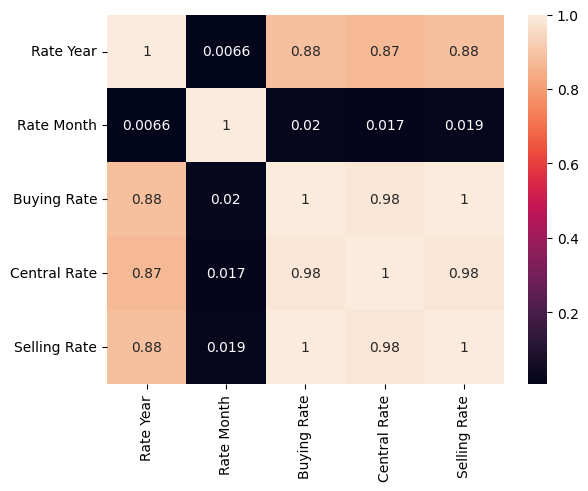

In [6]:
import seaborn as sns

# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

plt.savefig("./assets/heatmap.png")
plt.show()

## Linear Regression Model

Now, building a linear regression model using `scikit-learn`.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# create an instance of the linear regression model
lr = LinearRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the testing data
y_pred_lr = lr.predict(X_test)


# calculate the mean squared error of the model
mse_lr = r2_score(y_test, y_pred_lr)

# print the mean squared error of the model
print("R2 Score of Linear Regression model: {:%}".format(mse_lr))


# dump model artifact
with open("./production/artifacts/linear_model.pkl", "wb") as f:
    pickle.dump(lr, f)

pd.Series(y_pred_lr)

R2 Score of Linear Regression model: 78.924389%


0       106.655289
1       106.655289
2       177.892383
3       120.902708
4       320.366569
           ...    
1024    192.139801
1025    135.150127
1026    120.902708
1027     78.160452
1028    334.613988
Length: 1029, dtype: float64

In [14]:
X_test.shape

(1029, 1)

In the code above, we create an instance of the linear regression model, fit it to the training data, make predictions on the testing data and calculate the R2 score of the model.

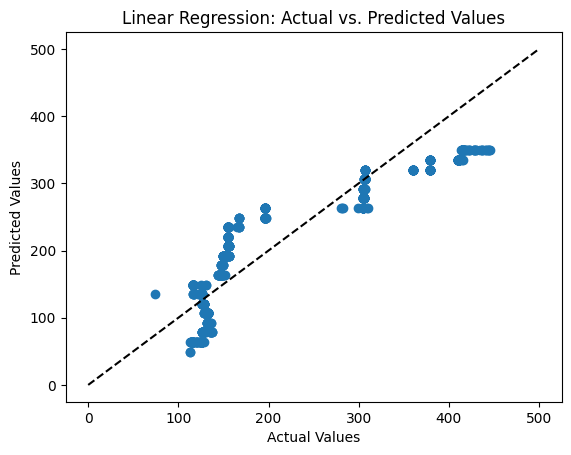

In [8]:
# plot predicted vs actual for linear regression model
plt.scatter(y_test, y_pred_lr)
plt.plot([0, 500], [0, 500], "--k")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted Values")

plt.savefig("./assets/lr.png")
plt.show()

These plots compare the predicted values from each model with the actual values. The diagonal line represents perfect predictions where actual and predicted values are equal. Any points above or below this line indicates overestimation or underestimation of the model, respectively.

## Support Vector Machine Model
Next, let's build a support vector machine (SVM) model.

In [9]:
from sklearn.svm import SVR

# create an instance of the SVM model
svm = SVR(kernel="rbf")

# fit the model to the training data
svm.fit(X_train_scaled, y_train)

# make predictions on the testing data
y_pred_svm = svm.predict(X_test_scaled)

# calculate the mean squared error of the model
mse_svm = r2_score(y_test, y_pred_svm)

# print the mean squared error of the model
print("R2 Score of the SVM model: {:%}".format(mse_svm))

pd.Series(y_pred_svm)

# dump model artifact
with open("./production/artifacts/support_model.pkl", "wb") as f:
    pickle.dump(svm, f)

R2 Score of the SVM model: 95.504179%


In the code above, an instance of the SVM model is created with the RBF kernel, fit it to the training data, make predictions on the testing data, and calculate the R2 score.

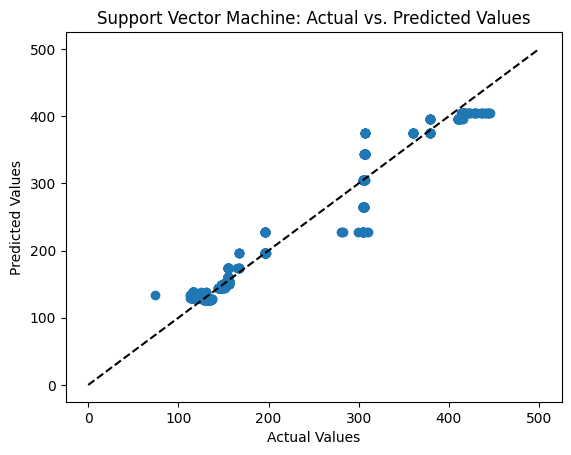

In [10]:
# plot predicted vs actual for linear regression model
plt.scatter(y_test, y_pred_svm)
plt.plot([0, 500], [0, 500], "--k")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Support Vector Machine: Actual vs. Predicted Values")

plt.savefig("./assets/svm.png")
plt.show()

## Artificial Neural Network Model

Finally, an artificial neural network (ANN) is created with two hidden layers, with 64 and 32 neurons respectively, and an ouput layer. 

For some non-linearity, the "ReLU" activation function is used. The "linear" activation function is used here because the problem being solved is a regression problem, where the goal is to predict a continuous numeric value.

The model is  also trained using the "adam" optimizer and a mean squared error loss function.

In [11]:
from keras.models import Sequential
from keras.layers import Dense

# create a sequential model
ann = Sequential()

# add the input layer and first hidden layer
ann.add(Dense(64, input_dim=X_train_scaled.shape[1], activation="relu"))

# add the output layer
ann.add(Dense(32, activation="relu"))

# add the output layer
ann.add(Dense(1, activation="linear"))

# compile the model
ann.compile(loss="mean_squared_error", optimizer="adam")

# fit the model to the training data
ann.fit(X_train_scaled, y_train, epochs=50, batch_size=32)

# make predictions on the testing data
y_pred_ann = ann.predict(X_test_scaled)

# calculate the mean squared error of the model
mse_ann = r2_score(y_test, y_pred_ann)

# print the mean squared error of the model
print("R2 Score of ANN model: {:%}".format(mse_ann))

# dump model artifact
ann.save("./production/artifacts/ann_model.h5")

Epoch 1/50
129/129 [==============================] - 3s 7ms/step - loss: 50278.8281
Epoch 2/50
129/129 [==============================] - 1s 4ms/step - loss: 35916.1172
Epoch 3/50
129/129 [==============================] - 1s 6ms/step - loss: 10064.2803
Epoch 4/50
129/129 [==============================] - 1s 7ms/step - loss: 1595.4071
Epoch 5/50
129/129 [==============================] - 1s 7ms/step - loss: 1199.9938
Epoch 6/50
129/129 [==============================] - 1s 6ms/step - loss: 1100.2548
Epoch 7/50
129/129 [==============================] - 1s 7ms/step - loss: 1038.0640
Epoch 8/50
129/129 [==============================] - 1s 6ms/step - loss: 1000.3914
Epoch 9/50
129/129 [==============================] - 1s 5ms/step - loss: 976.9993
Epoch 10/50
129/129 [==============================] - 1s 6ms/step - loss: 964.0096
Epoch 11/50
129/129 [==============================] - 1s 6ms/step - loss: 953.2748
Epoch 12/50
129/129 [==============================] - 1s 6ms/step - loss:

In the code above, sequential model is created, add the input layer, two hidden layers, and the output layer, compile the model with the mean squared error loss and the Adam optimizer, fit the model to the training data, make predictions on the testing data, and calculate the mean squared error of the model.

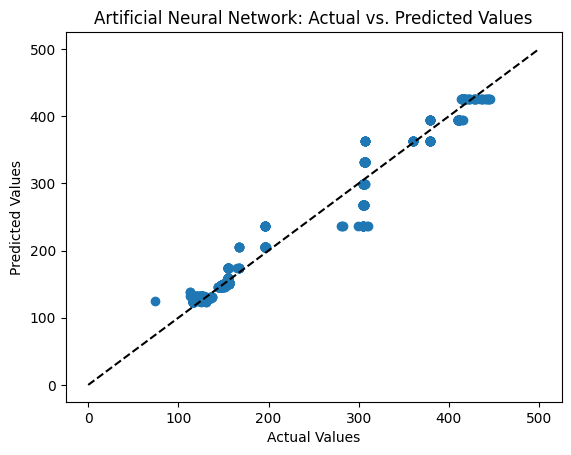

In [12]:
# plot predicted vs actual for linear regression model
plt.scatter(y_test, y_pred_ann)
plt.plot([0, 500], [0, 500], "--k")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Artificial Neural Network: Actual vs. Predicted Values")

plt.savefig("./assets/ann.png")
plt.show()

## Conclusion 

In this case study, I built a linear regression model, support vector machine model, and artifical neural network model to predict the rate of dollar to naira to using Python and scikit-learn and Keras. We have also evaluated the models using the R2 Score metric. 

Metric Summary:
- Linear Regression: 78.92%
- Support Vector Machine: 95.5%
- Artificial Neural Network: 96.66%

This shows the the ANN model does better than the SVM model which in turn outperforms the LR model.